In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

TABLE_DIR = "data/processed"

plt.rcParams["figure.figsize"] = (18, 10)

def filter_by_county(data, county, negate=False):
    return data.loc[(data["County"] == county) != negate]

def add_county_legend(data, by):
    current_handles, current_labels = plt.gca().get_legend_handles_labels()
    handles = dict(list(zip(current_labels, current_handles)))
    counties = list(reversed(data.groupby("County").mean().sort_values(by=by).to_dict()[by].keys()))
    plt.legend([handles[c] for c in counties], counties)

In [2]:
# RIH02
rent_data = pd.read_csv(os.path.join(TABLE_DIR, "rent.csv"))

# HPM04
property_data = pd.read_csv(os.path.join(TABLE_DIR, "property.csv"))

# CIA02
income_data = pd.read_csv(os.path.join(TABLE_DIR, "income.csv"))

# E2004, C0103, B0102
population_data = pd.read_csv(os.path.join(TABLE_DIR, "interpolated_population.csv"))
population_data["Total Population"] = population_data["Male Population"] + population_data["Female Population"]

min_year = max(data.Year.min() for data in [property_data, rent_data, income_data, population_data])
max_year = min(data.Year.max() for data in [property_data, rent_data, income_data, population_data])

rent_data = rent_data.loc[
    (rent_data.Year >= min_year)
    & (rent_data.Year <= max_year)
]
property_data = property_data.loc[
    (property_data.Year >= min_year)
    & (property_data.Year <= max_year)
]
income_data = income_data.loc[
    (income_data.Year >= min_year)
    & (income_data.Year <= max_year)
]
population_data = population_data.loc[
    (population_data.Year >= min_year)
    & (population_data.Year <= max_year)
]
min_year, max_year

(2010, 2016)

In [3]:
rent_data

,County,Type,Bedrooms,Year,Rent
2,Carlow,All,1,2010,500.75
3,Carlow,All,1,2011,483.30
4,Carlow,All,1,2012,456.56
5,Carlow,All,1,2013,429.21
6,Carlow,All,1,2014,430.01
...,...,...,...,...,...
10910,Wicklow,Terrace house,All,2012,782.74
10911,Wicklow,Terrace house,All,2013,807.01
10912,Wicklow,Terrace house,All,2014,886.90
10913,Wicklow,Terrace house,All,2015,941.77


In [4]:
property_data

,County,Buyer Type,Year,Execution Volume,Execution Mean Value,Filing Volume,Filing Mean Value
0,Carlow,All,2010,201,183651.0,190,192686.0
1,Carlow,All,2011,156,147801.0,219,161986.0
2,Carlow,All,2012,230,112309.0,226,116867.0
3,Carlow,All,2013,272,116875.0,287,118518.0
4,Carlow,All,2014,396,117221.0,390,117647.0
...,...,...,...,...,...,...,...
1238,Wicklow,Non-Occupier,2012,70,155932.0,73,156097.0
1239,Wicklow,Non-Occupier,2013,94,194841.0,87,176823.0
1240,Wicklow,Non-Occupier,2014,167,202241.0,157,214692.0
1241,Wicklow,Non-Occupier,2015,121,265590.0,132,249473.0


In [5]:
income_data

,County,Year,Employee Income,Taxes Paid,Disposable Income per Household,Disposable Income per Person,Disposable Income per Person Minus Rent,Self Employed Income,Capital Gains,Primary Income,Income from Rent,Social Benefits,Total Income per Household,Total Income per Person
10,Carlow,2010,662,271,993,18372,17045,117,17,867,71,397,1264,23384
11,Carlow,2011,640,291,946,17365,16270,113,14,838,71,398,1236,22705
12,Carlow,2012,632,302,974,17809,16650,105,40,855,79,420,1276,23335
13,Carlow,2013,662,322,967,17612,16092,105,36,880,76,409,1289,23476
14,Carlow,2014,705,358,987,17844,16121,119,42,949,82,395,1344,24312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Wicklow,2012,2037,1112,2409,17612,16210,309,127,2714,240,808,3521,25740
488,Wicklow,2013,2017,1091,2392,17406,15554,319,110,2679,233,804,3483,25342
489,Wicklow,2014,2104,1155,2453,17730,15643,347,126,2827,250,782,3608,26082
490,Wicklow,2015,2296,1240,2609,18689,16602,353,124,3056,284,792,3849,27568


<module 'matplotlib.pyplot' from '/home/soren/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

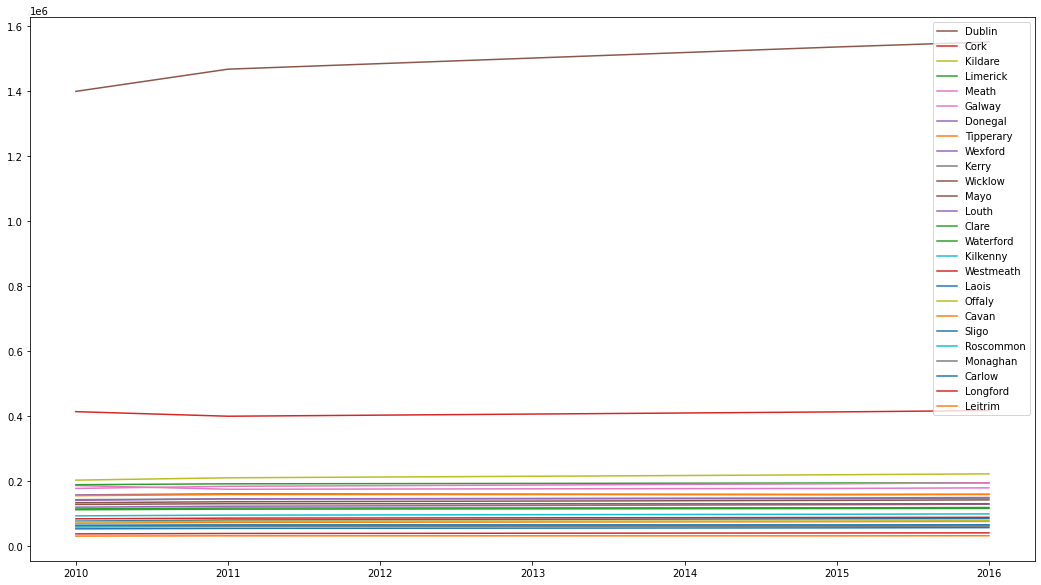

In [6]:
#population_data = filter_by_county(population_data, "Dublin", negate=True)
#population_data = filter_by_county(population_data, "Cork", negate=True)

for county, df in population_data.groupby('County'):
    plt.plot(df['Year'], df['Total Population'], label=county)
add_county_legend(population_data, "Total Population")
plt

In [7]:
property_data = property_data.loc[property_data["Buyer Type"] == "All"].copy()
execution_volume = property_data["Execution Volume"]
filing_volume = property_data["Filing Volume"]
volume = execution_volume + filing_volume
property_data["Volume"] = volume
property_data["Mean Value"] = (
    execution_volume * property_data["Execution Mean Value"]
    + filing_volume * property_data["Filing Mean Value"]
) / volume
property_data

,County,Buyer Type,Year,Execution Volume,Execution Mean Value,Filing Volume,Filing Mean Value,Volume,Mean Value
0,Carlow,All,2010,201,183651.0,190,192686.0,391,188041.409207
1,Carlow,All,2011,156,147801.0,219,161986.0,375,156085.040000
2,Carlow,All,2012,230,112309.0,226,116867.0,456,114568.008772
3,Carlow,All,2013,272,116875.0,287,118518.0,559,117718.543828
4,Carlow,All,2014,396,117221.0,390,117647.0,786,117432.374046
...,...,...,...,...,...,...,...,...,...
1202,Wicklow,All,2012,636,245946.0,631,243167.0,1267,244561.983425
1203,Wicklow,All,2013,780,264616.0,784,255513.0,1564,260052.859335
1204,Wicklow,All,2014,1073,280030.0,1049,286951.0,2122,283451.361451
1205,Wicklow,All,2015,1082,314731.0,1090,309582.0,2172,312147.017495


<module 'matplotlib.pyplot' from '/home/soren/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

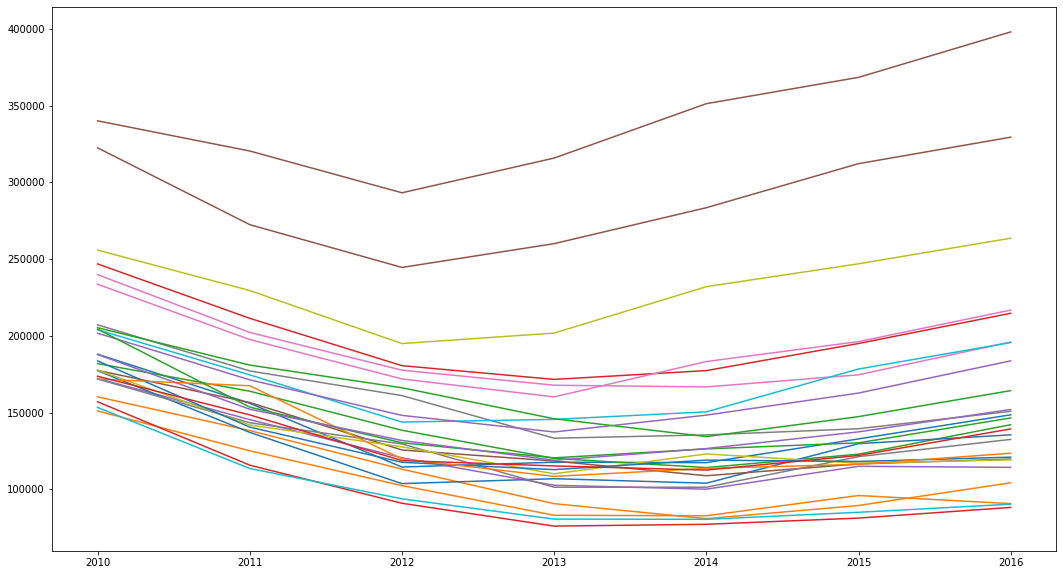

In [8]:
for county, df in property_data.groupby('County'):
    plt.plot(df['Year'], df['Mean Value'], label=county)
plt

In [9]:
rent_data = rent_data.loc[(rent_data["Type"] == "All") & (rent_data["Bedrooms"] == "All")]
rent_data

,County,Type,Bedrooms,Year,Rent
58,Carlow,All,All,2010,647.15
59,Carlow,All,All,2011,627.17
60,Carlow,All,All,2012,629.31
61,Carlow,All,All,2013,599.26
62,Carlow,All,All,2014,620.63
...,...,...,...,...,...
10560,Wicklow,All,All,2012,829.70
10561,Wicklow,All,All,2013,843.78
10562,Wicklow,All,All,2014,898.11
10563,Wicklow,All,All,2015,968.50


<module 'matplotlib.pyplot' from '/home/soren/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

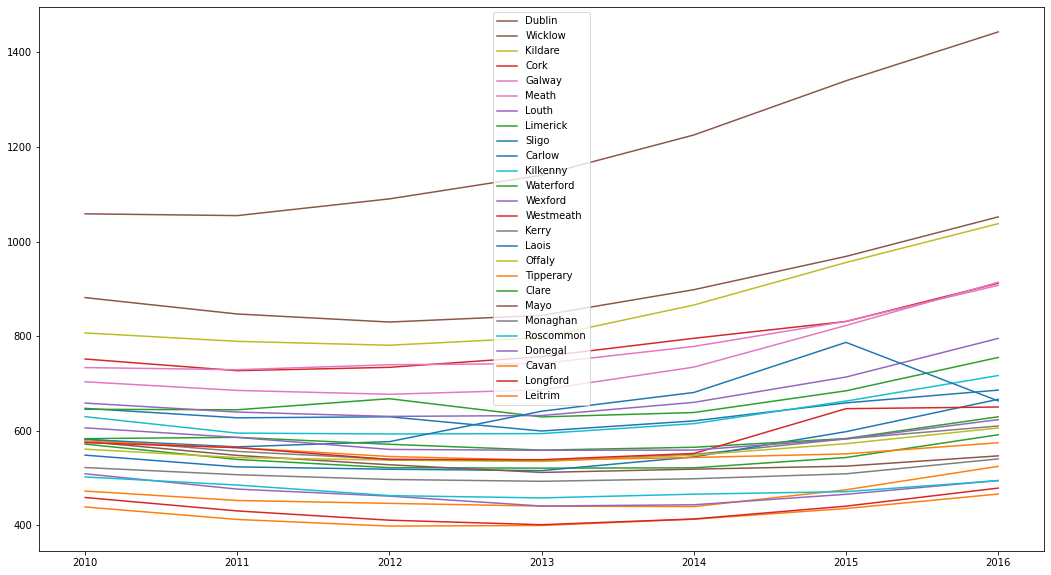

In [10]:
for county, df in rent_data.groupby('County'):
    plt.plot(df['Year'], df['Rent'], label=county)
add_county_legend(rent_data, "Rent")
plt

In [11]:
X = 'Mean Value'
Y = 'Rent'
rent_property_income_population = pd.merge(rent_data, property_data,  how='left', left_on=['County', 'Year'], right_on = ['County','Year'])
rent_property_income_population = pd.merge(
    rent_property_income_population,
    income_data,
    how='left',
    left_on=['County', 'Year'],
    right_on = ['County','Year'],
)
rent_property_income_population = pd.merge(
    rent_property_income_population,
    population_data,
    how='left',
    left_on=['County', 'Year'],
    right_on = ['County','Year'],
)
rent_property_income_population = rent_property_income_population.sort_values(by=X)
rent_property_income_population

,County,Type,Bedrooms,Year,Rent,Buyer Type,Execution Volume,Execution Mean Value,Filing Volume,Filing Mean Value,...,Self Employed Income,Capital Gains,Primary Income,Income from Rent,Social Benefits,Total Income per Household,Total Income per Person,Female Population,Male Population,Total Population
94,Longford,All,All,2013,401.10,All,193,74912.4,192,77303.5,...,61,23,563,42,289,852,21711,19726,20024,39750
95,Longford,All,All,2014,413.20,All,363,76438.0,349,78148.6,...,68,25,569,45,279,848,21476,19913,20211,40124
137,Roscommon,All,All,2014,465.69,All,381,79743.1,383,81278.2,...,135,46,1031,84,371,1402,21612,31726,32367,64093
136,Roscommon,All,All,2013,457.79,All,371,79293.0,356,82068.5,...,123,40,972,78,380,1352,20988,31721,32362,64083
11,Cavan,All,All,2014,439.44,All,339,81053.1,323,80838.4,...,172,54,1221,89,416,1636,22084,36960,37803,74763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Wicklow,All,All,2016,1052.04,All,1164,330634.0,1183,328146.0,...,371,99,3239,297,802,4041,28630,72269,70156,142425
35,Dublin,All,All,2010,1058.53,All,6258,338053.0,6587,341911.0,...,2422,589,29381,2534,7441,36822,29178,710755,688693,1399448
39,Dublin,All,All,2014,1225.25,All,11289,351726.0,11119,350685.0,...,2461,1500,33637,2898,7308,40945,31767,778199,740827,1519026
40,Dublin,All,All,2015,1339.88,All,12001,369940.0,12347,366797.0,...,2523,1444,35692,3277,7390,43082,33122,786732,749360,1536092


<module 'matplotlib.pyplot' from '/home/soren/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

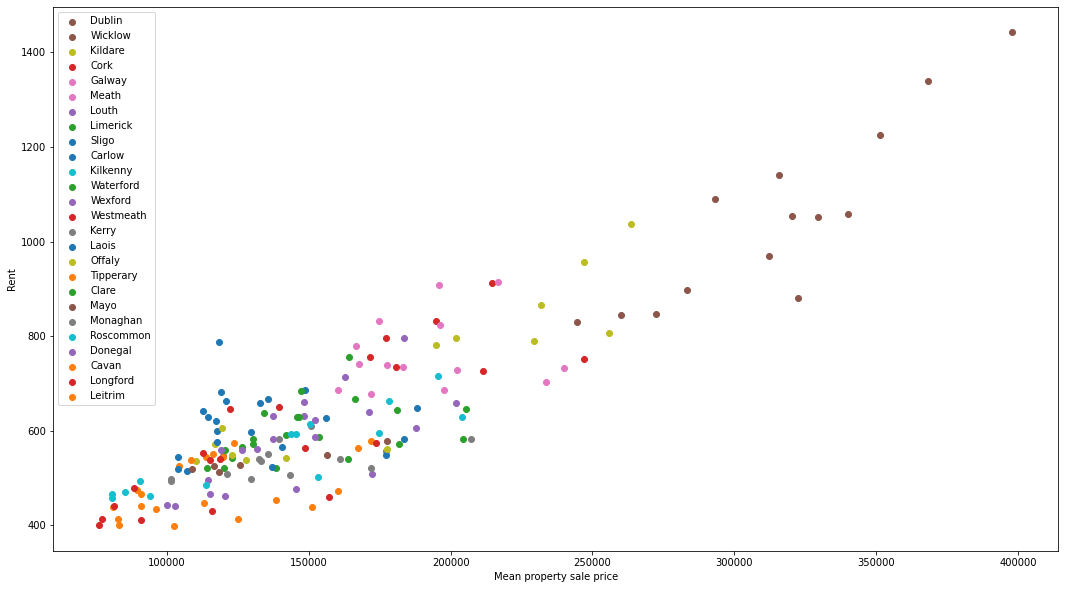

In [12]:
#rent_and_property = filter_by_county(rent_and_property, "Dublin")

for county, df in rent_property_income_population.groupby('County'):
    plt.scatter(df[X], df[Y], label=county)
plt.xlabel("Mean property sale price")
plt.ylabel(Y)
add_county_legend(rent_property_income_population, "Rent")
plt

<module 'matplotlib.pyplot' from '/home/soren/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

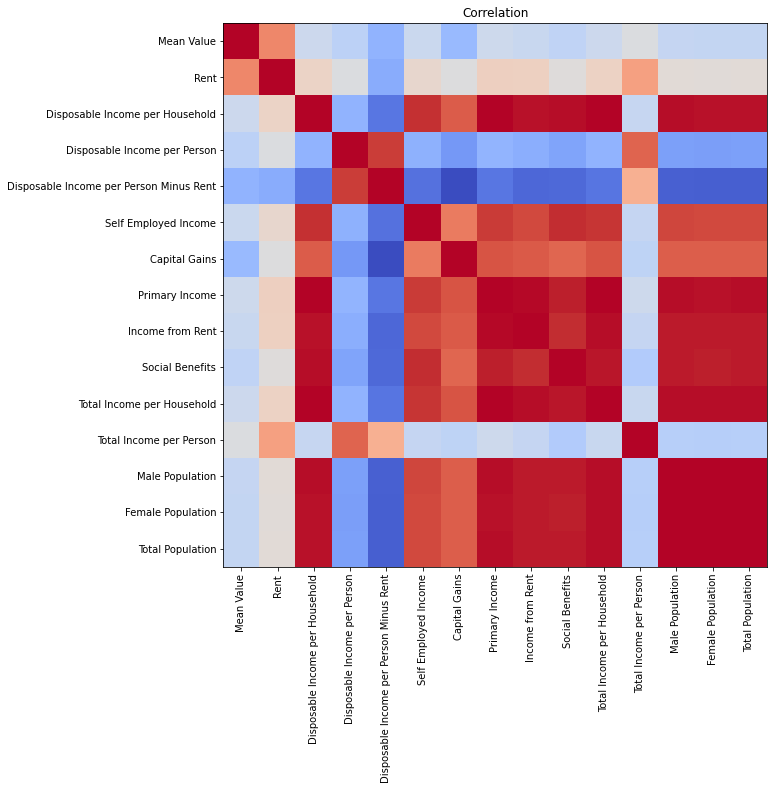

In [13]:
variables = [
    "Mean Value",
    # "Filing Mean Value",
    # "Execution Mean Value",
    "Rent",
    "Disposable Income per Household",
    "Disposable Income per Person",
    "Disposable Income per Person Minus Rent",
    "Self Employed Income",
    "Capital Gains",
    "Primary Income",
    "Income from Rent",
    "Social Benefits",
    "Total Income per Household",
    "Total Income per Person",
    "Male Population",
    "Female Population",
    "Total Population",
]
input_columns = np.array([rent_property_income_population[variable].to_numpy() for variable in variables])
input_columns
correlation_matrix = np.corrcoef(input_columns)
h, w = correlation_matrix.shape
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Correlation")
plt.xticks(np.arange(w), variables, rotation=90)
plt.yticks(np.arange(h), variables)
plt

<module 'matplotlib.pyplot' from '/home/soren/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

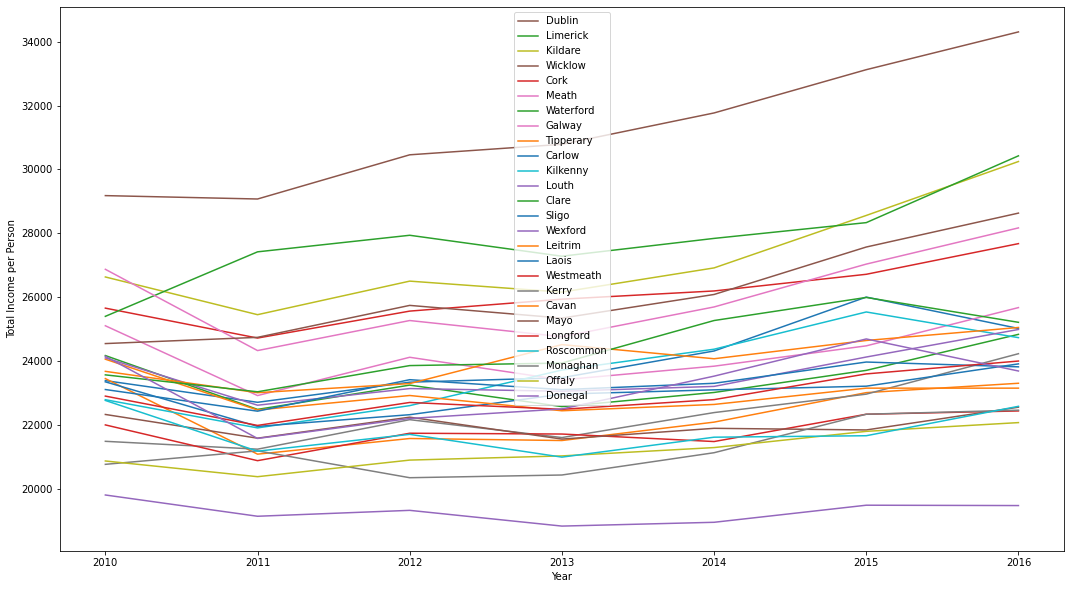

In [14]:
X = "Year"
Y = "Capital Gains"
Y = "Taxes Paid"
Y = "Disposable Income per Person Minus Rent"
Y = "Total Income per Person"
for county, df in income_data.groupby('County'):
    plt.plot(
        df[X],
        df[Y],
        label=county,
    )
plt.xlabel(X)
plt.ylabel(Y)
add_county_legend(income_data, Y)
plt

In [15]:
income_data

,County,Year,Employee Income,Taxes Paid,Disposable Income per Household,Disposable Income per Person,Disposable Income per Person Minus Rent,Self Employed Income,Capital Gains,Primary Income,Income from Rent,Social Benefits,Total Income per Household,Total Income per Person
10,Carlow,2010,662,271,993,18372,17045,117,17,867,71,397,1264,23384
11,Carlow,2011,640,291,946,17365,16270,113,14,838,71,398,1236,22705
12,Carlow,2012,632,302,974,17809,16650,105,40,855,79,420,1276,23335
13,Carlow,2013,662,322,967,17612,16092,105,36,880,76,409,1289,23476
14,Carlow,2014,705,358,987,17844,16121,119,42,949,82,395,1344,24312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Wicklow,2012,2037,1112,2409,17612,16210,309,127,2714,240,808,3521,25740
488,Wicklow,2013,2017,1091,2392,17406,15554,319,110,2679,233,804,3483,25342
489,Wicklow,2014,2104,1155,2453,17730,15643,347,126,2827,250,782,3608,26082
490,Wicklow,2015,2296,1240,2609,18689,16602,353,124,3056,284,792,3849,27568


In [37]:
population_rent_correlation = {}
for county in population_data["County"].unique():
    population_rent_correlation[county] = rent_property_income_population.loc[rent_property_income_population["County"] == county].sort_values(by="Year")["Total Population"].corr(rent_property_income_population.loc[rent_property_income_population["County"] == county].sort_values(by="Year")["Rent"], method="spearman")

In [38]:
population_rent_correlation

{'Carlow': 0.3571428571428572,
 'Cavan': 0.28571428571428575,
 'Clare': 0.14285714285714288,
 'Cork': 0.7857142857142859,
 'Donegal': -0.4642857142857144,
 'Dublin': 0.9642857142857145,
 'Galway': 0.4642857142857144,
 'Kerry': 0.39285714285714296,
 'Kildare': 0.7500000000000002,
 'Kilkenny': 0.5357142857142858,
 'Laois': 0.5,
 'Leitrim': -0.14285714285714288,
 'Limerick': 0.42857142857142866,
 'Longford': 0.21428571428571433,
 'Louth': 0.6785714285714287,
 'Mayo': 0.10714285714285716,
 'Meath': 0.7500000000000002,
 'Monaghan': 0.21428571428571433,
 'Offaly': 0.5,
 'Roscommon': -0.14285714285714288,
 'Sligo': -0.3571428571428572,
 'Tipperary': -0.21428571428571433,
 'Waterford': 0.21428571428571433,
 'Westmeath': 0.39285714285714296,
 'Wexford': 0.0,
 'Wicklow': 0.6785714285714287}

<AxesSubplot:>

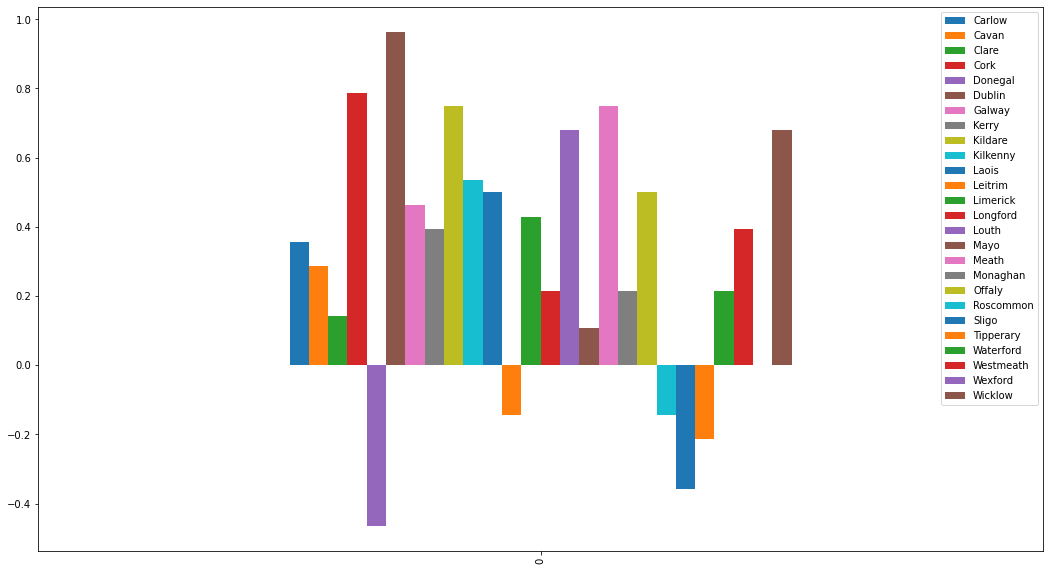

In [64]:
pd.DataFrame(population_rent_correlation, index=[0]).plot.bar()

<AxesSubplot:ylabel='Density'>

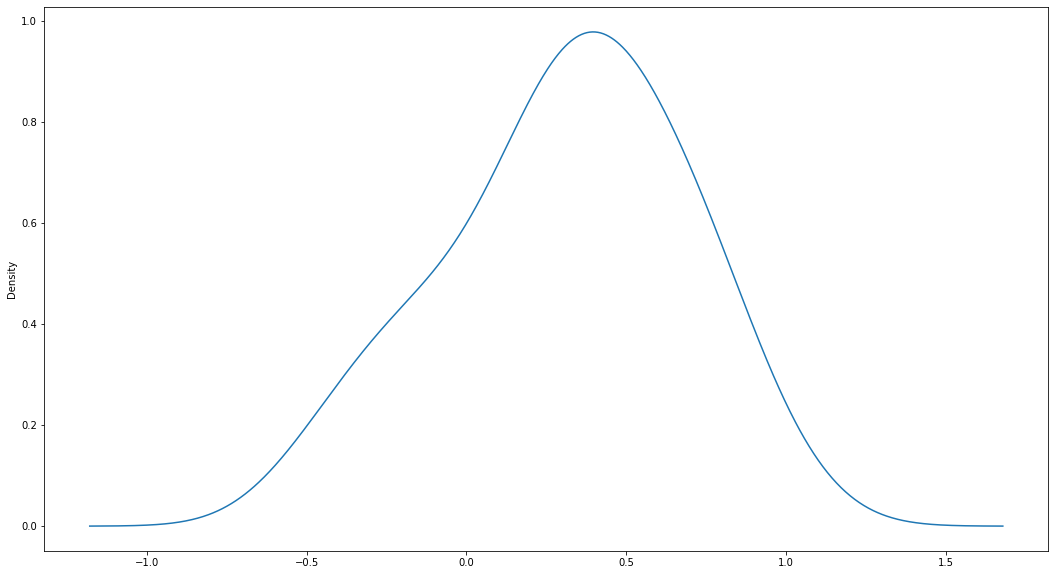

In [80]:
pd.Series(list(population_rent_correlation.values())).plot.kde()

In [73]:
pd.Series(list(population_rent_correlation.values())).mean()

0.3090659340659342

In [74]:
pd.Series(list(population_rent_correlation.values())).std()

0.3694925239767719